In [17]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from simulator.map_utils import create_regions
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as M
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot

In [32]:
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [26]:
graph.network_polygon_bounds

[(0.0, 0.0),
 (0.0, 98.53143101823554),
 (95.58191009784183, 98.53143101823554),
 (95.58191009784183, 0.0),
 (0.0, 0.0)]

In [20]:
from numpy import random

In [21]:
scaling_factor = 10

# Prueba 1: todos HL5 femtoceldas, ningún HL4 macrocelda

[(0.0, 0.0), (0.0, 985.3143101823554), (955.8191009784183, 985.3143101823554), (955.8191009784183, 0.0), (0.0, 0.0)]


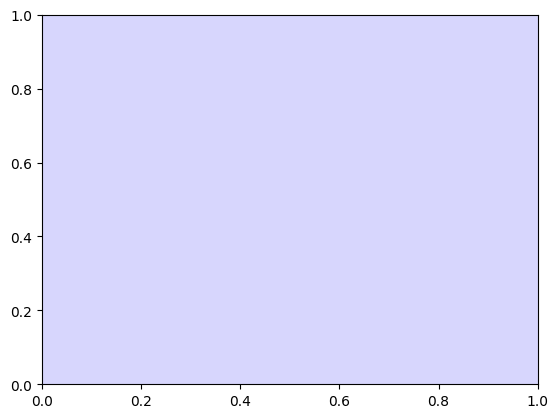

In [6]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 0.1))
        assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

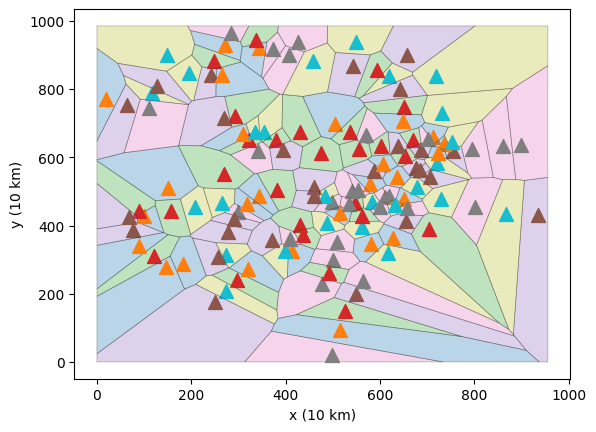

In [7]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker='^', s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()


# Prueba 2: ningún HL5 femtocelda y todas HL4 macroceldas

[(0.0, 0.0), (0.0, 985.3143101823554), (955.8191009784183, 985.3143101823554), (955.8191009784183, 0.0), (0.0, 0.0)]


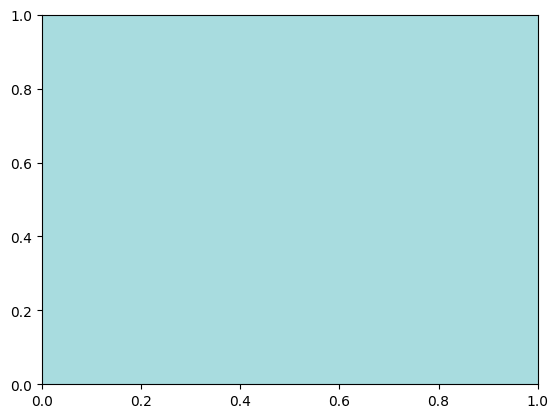

In [36]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL4":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 40))
        assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

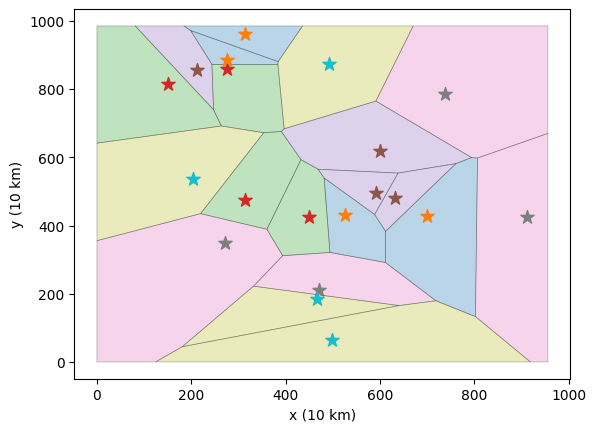

In [39]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    shape = "*" if node_assoc.type == "HL4" else "^"
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker=shape, s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()


# Prueba 3: todas HL5 femtoceldas y todas HL4 macroceldas

/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulatio

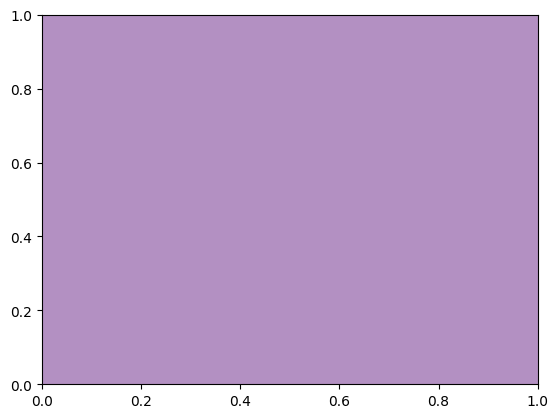

In [40]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 10))
    else:
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, 10000))
    assocciated_nodes.append(node)

fig, ax = plt.subplots()
alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]

regions = create_regions(len(celdas), np.array(celdas), ax, alpha_loss, {}, None, polygon_bounds=base_area)

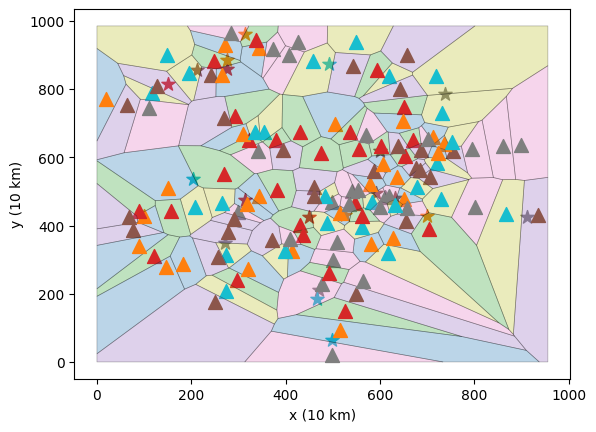

In [ ]:
# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)
        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    shape = "*" if node_assoc.type == "HL4" else "^"
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker=shape, s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()

# Test 4: influencia de 1 femtocelda en todas las macroceldas

[(0.0, 0.0), (0.0, 985.3143101823554), (955.8191009784183, 985.3143101823554), (955.8191009784183, 0.0), (0.0, 0.0)]


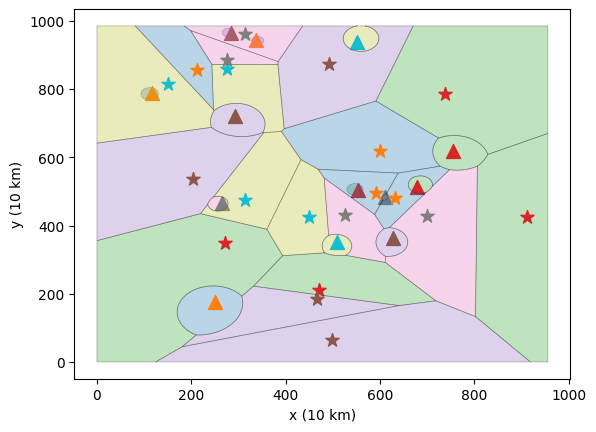

In [37]:

# Suponemos que todos los nodos HL5 tienen una femtocelda y todos los nodos HL4 tienen una macrocelda
# Pasamos todas las coordenadas de los nodos a la lista, y la p_tx será 40 para los HL4 (macrocelda) y 0.1 para las femtoceldas

celdas = []
assocciated_nodes = []
p_tx_fem = 1
p_tx_macro = 50
scaling_factor = 10
for node in graph.nodes:
    if node.type == "HL4":
        # celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        assocciated_nodes.append(node)
    elif random.rand() < 0.1:
        # celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
        assocciated_nodes.append(node)

assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        celdas.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))


alpha_loss = 4
base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

regions = create_regions(len(celdas), np.array(celdas), alpha_loss, polygon_bounds=base_area)


# Plot each region with a different color
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green']
for i in range(len(regions)-1, -1, -1):
    region = regions[i]
    if isinstance(region, Polygon):
        x, y = region.exterior.coords.xy
        ax.fill(x, y, alpha=0.3, label=f'Region {i}', edgecolor='black', linewidth=0.5)

        
    # Add the base stations to the plot
    node_assoc = assocciated_nodes[i]
    shape = "*" if node_assoc.type == "HL4" else "^"
    ax.scatter(node_assoc.pos[0] * scaling_factor, node_assoc.pos[1] * scaling_factor, label=f'Base Station {i}', marker=shape, s=100)
    
# ax.set_xlim(13, 16)
# ax.set_ylim(9, 11)
# ax.legend()
ax.set_xlabel(f"x ({scaling_factor} km)")
ax.set_ylabel(f"y ({scaling_factor} km)")
plt.show()

# Power sweep

/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulation-python-Sj3CBpnm-py3.11/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/elig/.cache/pypoetry/virtualenvs/pof-simulatio

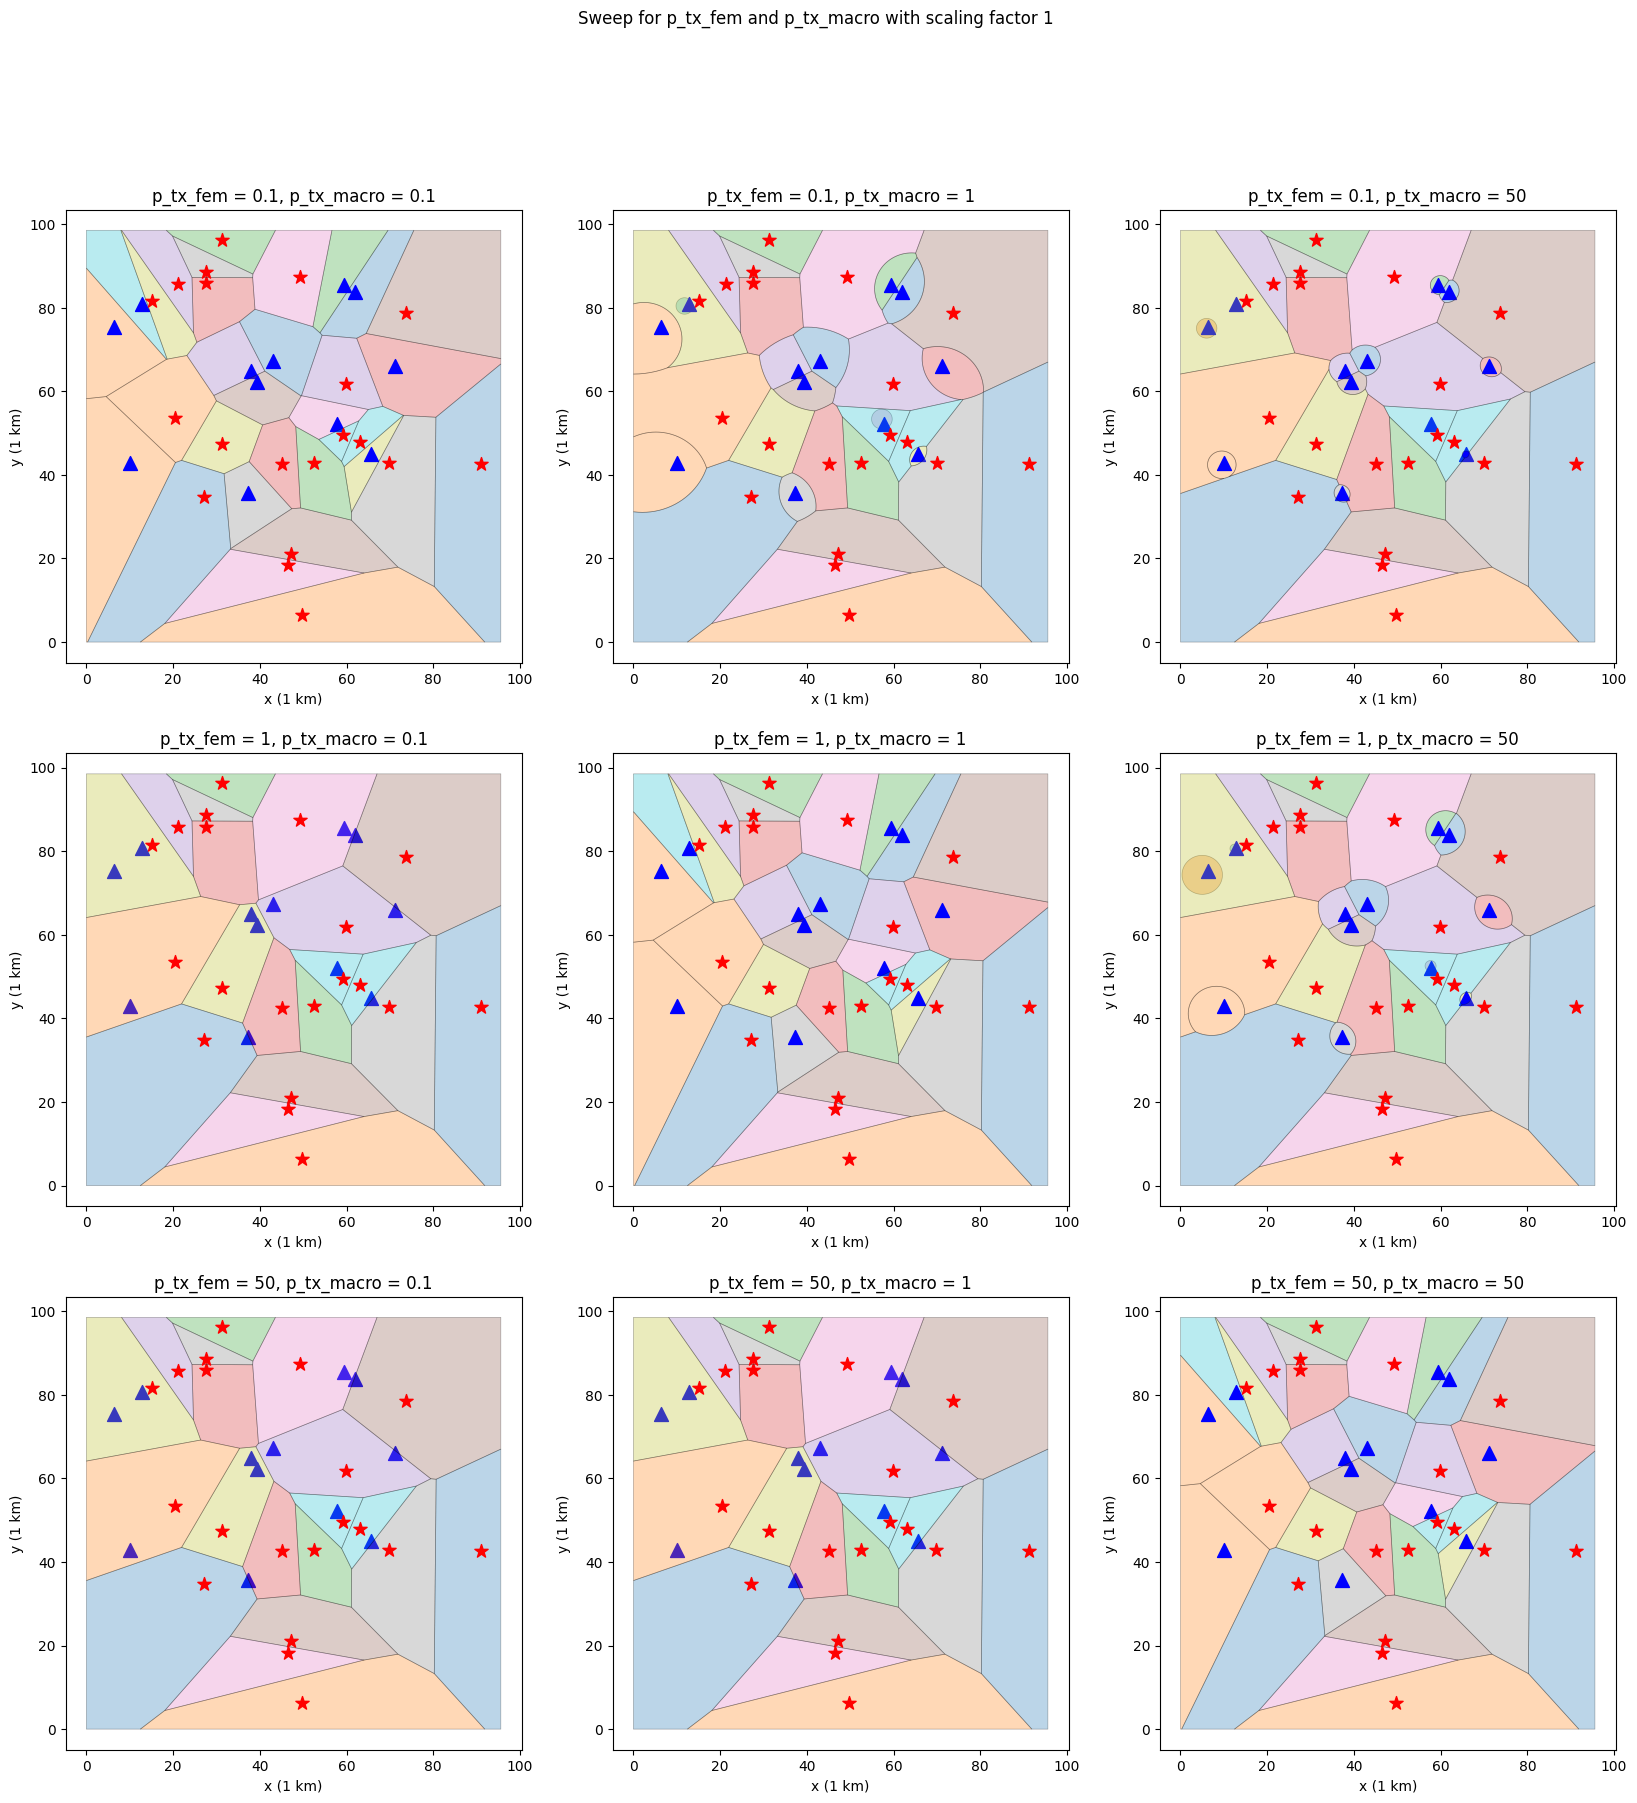

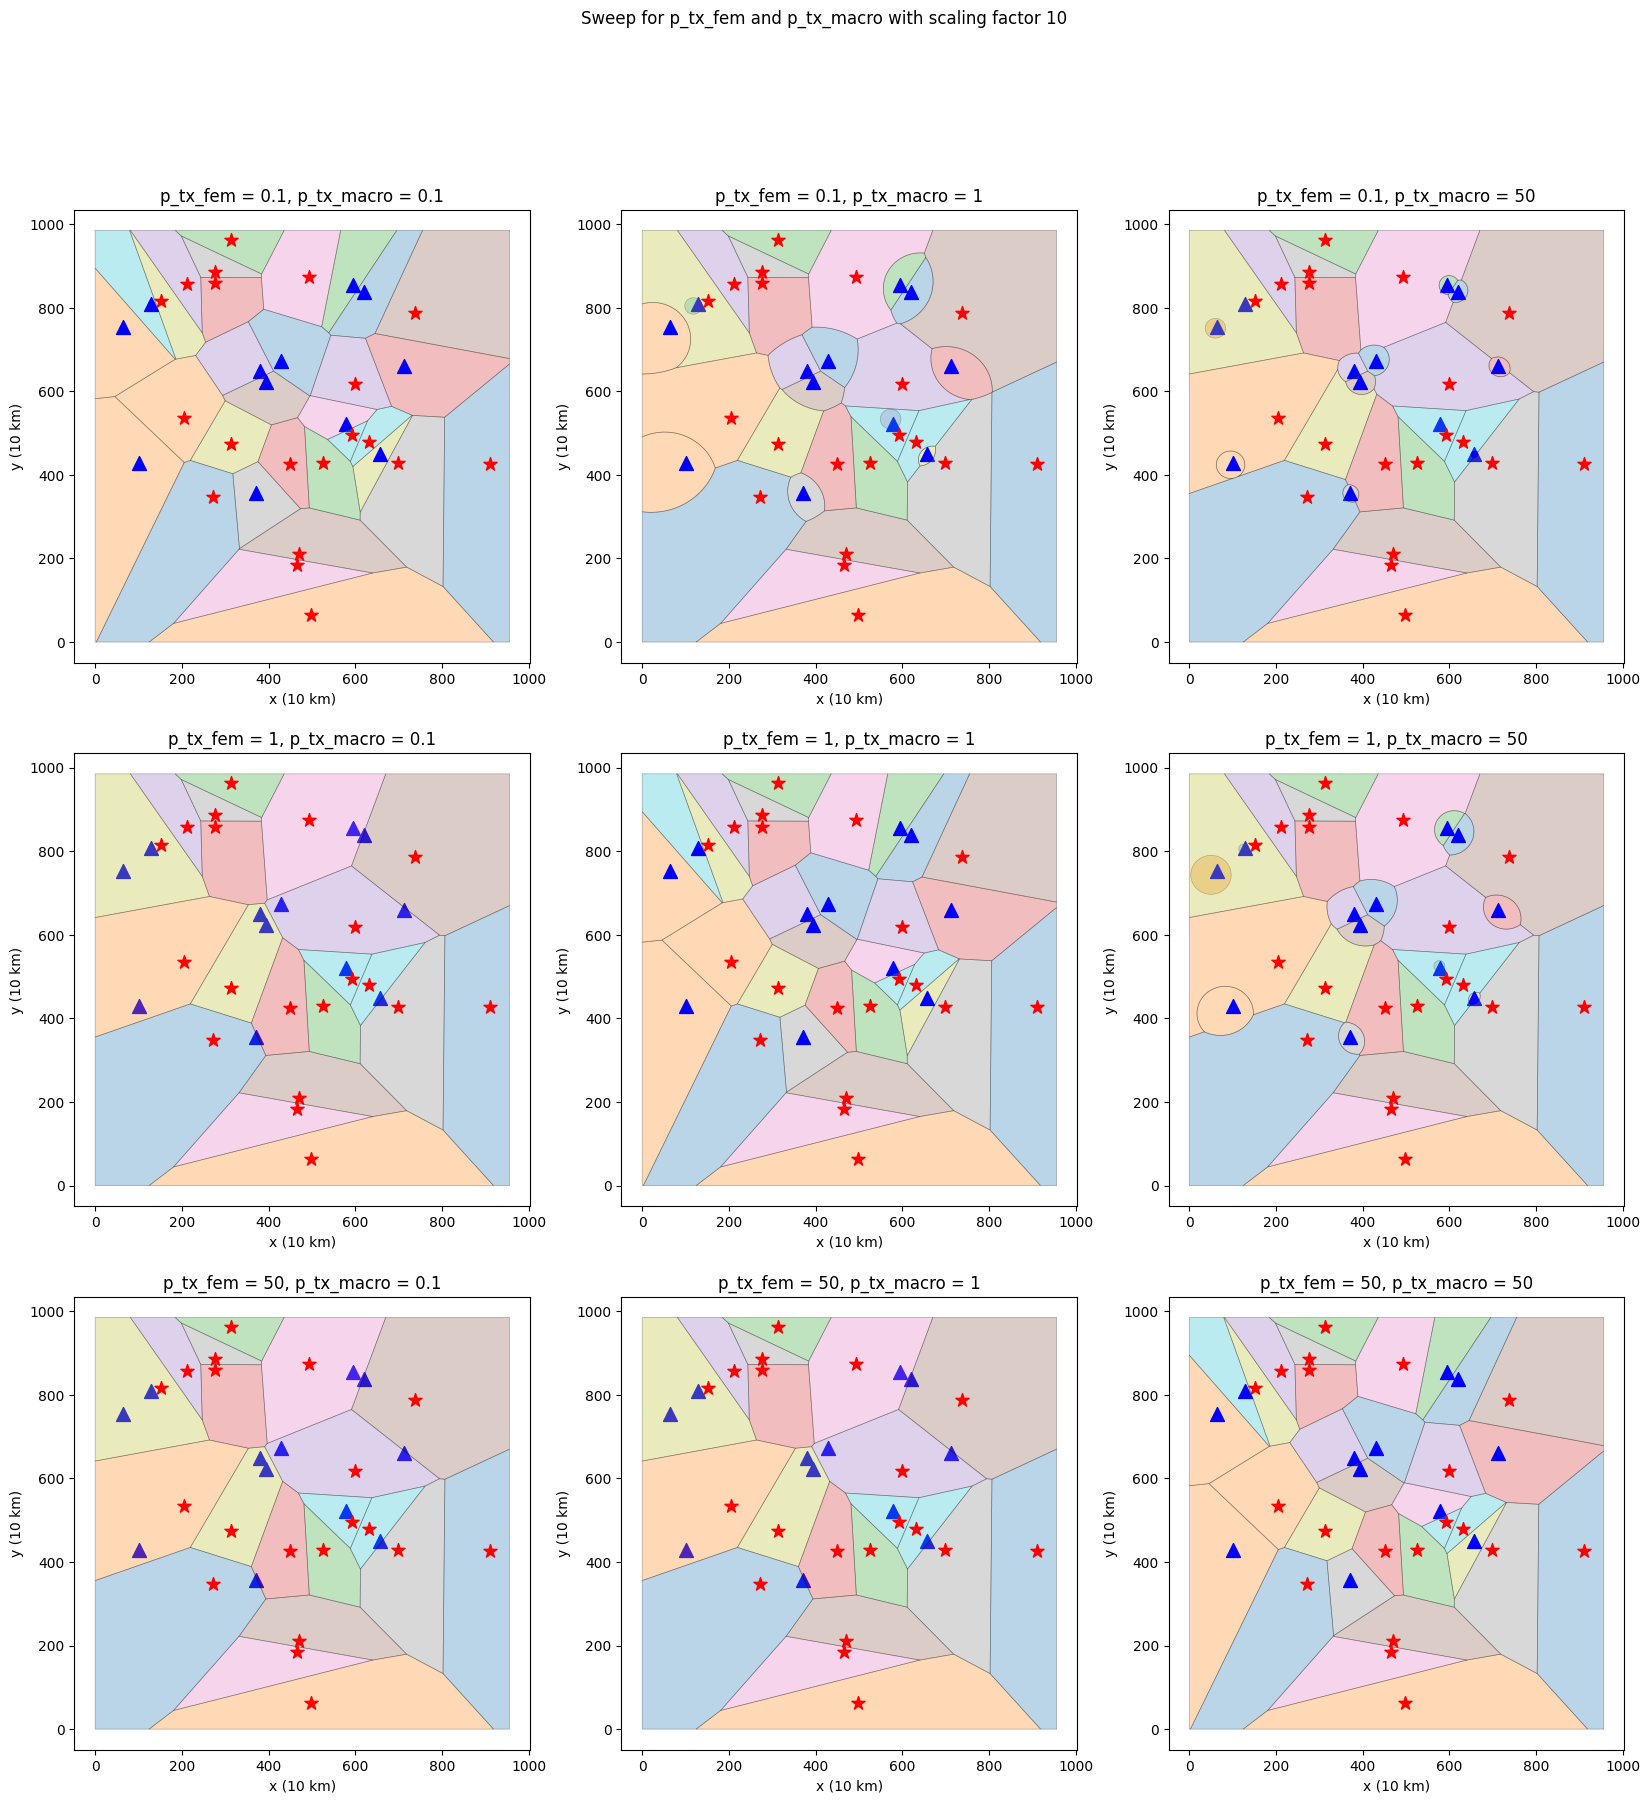

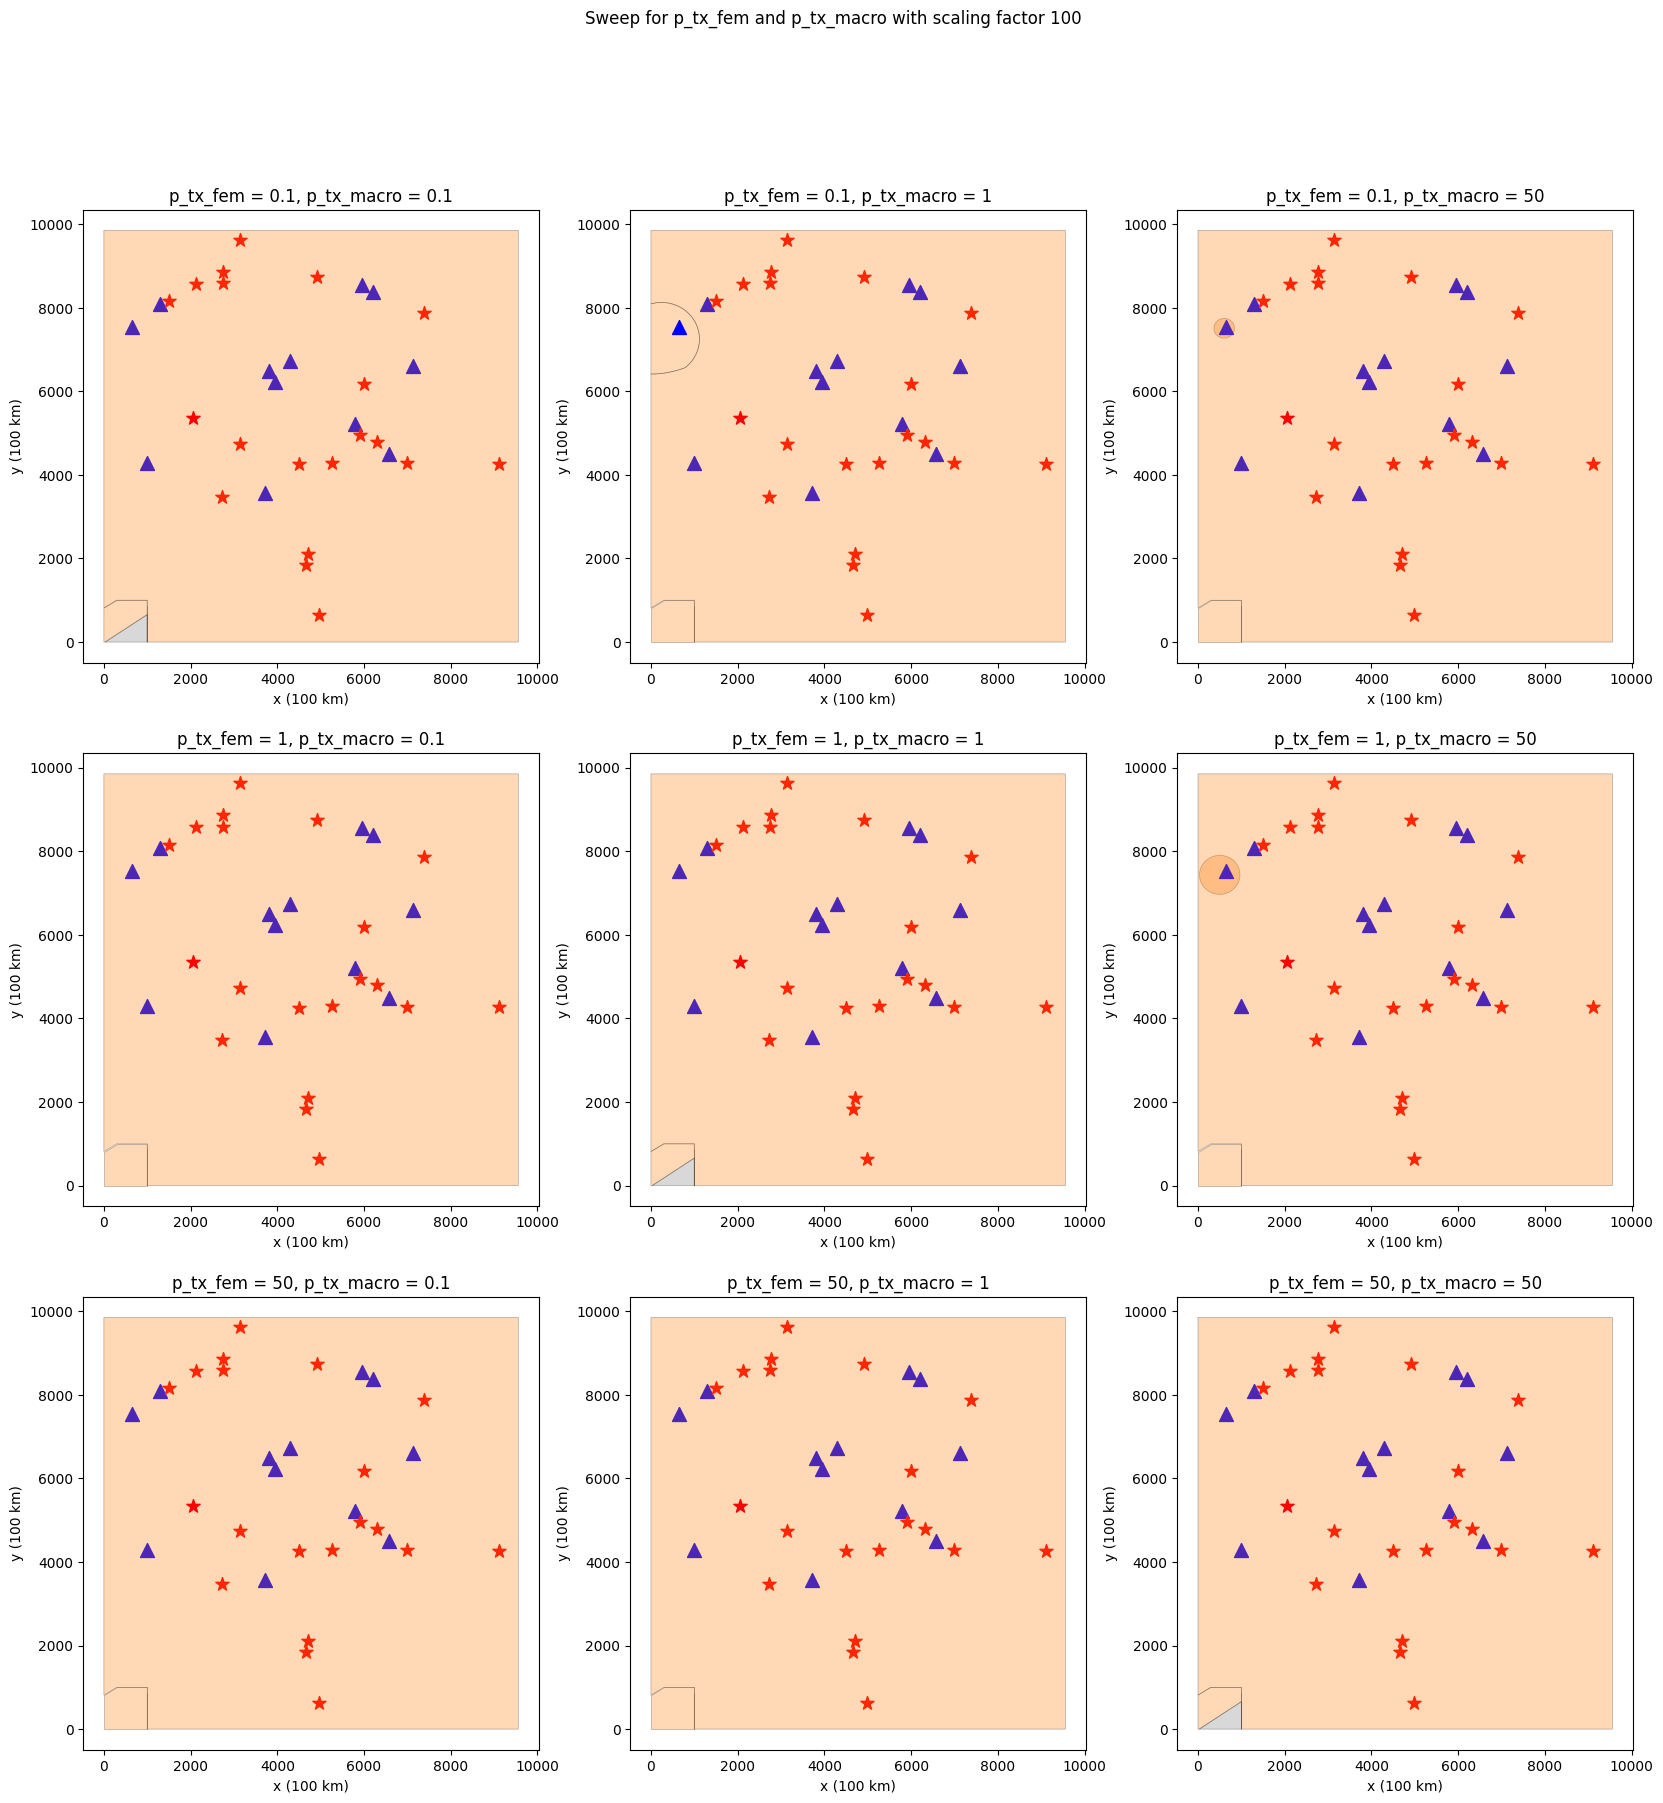

In [43]:
def choose_nodes_to_build_bs(graph):
    nodes_to_build_bs = []
    for node in graph.nodes:
        if node.type == "HL4":
            nodes_to_build_bs.append(node)
        elif random.rand() < 0.1:
            nodes_to_build_bs.append(node)
    
    # sort them, first the HL4, then the HL5
    nodes_to_build_bs.sort(key=lambda x: x.type == "HL4", reverse=True)
    return nodes_to_build_bs


def build_matrix_bs_positions(nodes_to_build_bs, polygon_bounds, scale_factor, p_tx_fem, p_tx_macro):
    cells = []
    
    for node in nodes_to_build_bs:
        if node.type == "HL4":
            # HL4 = macrocell
            cells.append((node.pos[0] * scale_factor, node.pos[1] * scale_factor, p_tx_macro))
        else:
            # HL5 = femtocell
            cells.append((node.pos[0] * scale_factor, node.pos[1] * scale_factor, p_tx_fem))
            
    base_area = [(x * scale_factor, y * scale_factor) for x, y in polygon_bounds]
    
    return cells, base_area


# Generate a graph common to all sweeps. Baseline design
nodes_to_build_bs = choose_nodes_to_build_bs(graph)
polygon_bounds = graph.network_polygon_bounds
alpha_loss = 4

sweep_p_tx = [0.1, 1, 50] # Try each combination for both p_tx_fem and p_tx_macro. 9 combinations total.
sweep_scaling_factor = [1, 10, 100] # Try each scaling factor. 3 combinations total.

# One figure for each scale factor. Inside each figure, the sweep for p_tx_fem and p_tx_macro.
for scale_factor in sweep_scaling_factor:
    fig, ax = plt.subplots(len(sweep_p_tx), len(sweep_p_tx), figsize=(20, 20))
    # fig.tight_layout()
    fig.suptitle(f"Sweep for p_tx_fem and p_tx_macro with scaling factor {scale_factor}")
    
    for i, p_tx_fem in enumerate(sweep_p_tx):
        for j, p_tx_macro in enumerate(sweep_p_tx):
            # print(f'i={i}, j={j}')
            # Build the cells and associated nodes
            cells, base_area = build_matrix_bs_positions(nodes_to_build_bs, polygon_bounds, scale_factor, p_tx_fem, p_tx_macro)
            # Create the regions (estimated coverage)
            regions = create_regions(len(cells), np.array(cells), alpha_loss, polygon_bounds=base_area)
            
            # Plot the regions
            for k in range(len(regions)-1, -1, -1):
                region = regions[k]
                if isinstance(region, Polygon):
                    x, y = region.exterior.coords.xy
                    ax[i, j].fill(x, y, alpha=0.3, edgecolor='black', linewidth=0.5)
                    
                node = nodes_to_build_bs[k]
                shape = "*" if node.type == "HL4" else "^"
                color = "red" if node.type == "HL4" else "blue"
                ax[i, j].scatter(node.pos[0] * scale_factor, node.pos[1] * scale_factor, marker=shape, s=100, color=color)
                
                
                    
                
                    
                
            
            # Plot the base stations
            # for node in assocciated_nodes:
                # shape = "*" if node.type == "HL4" else "^"
                # color = "red" if node.type == "HL4" else "blue"
                # ax[i, j].scatter(node.pos[0] * scale_factor, node.pos[1] * scale_factor, marker=shape, s=100, color=color)
            
            ax[i, j].set_xlabel(f"x ({scale_factor} km)")
            ax[i, j].set_ylabel(f"y ({scale_factor} km)")
            ax[i, j].set_title(f"p_tx_fem = {p_tx_fem}, p_tx_macro = {p_tx_macro}")
    
    


